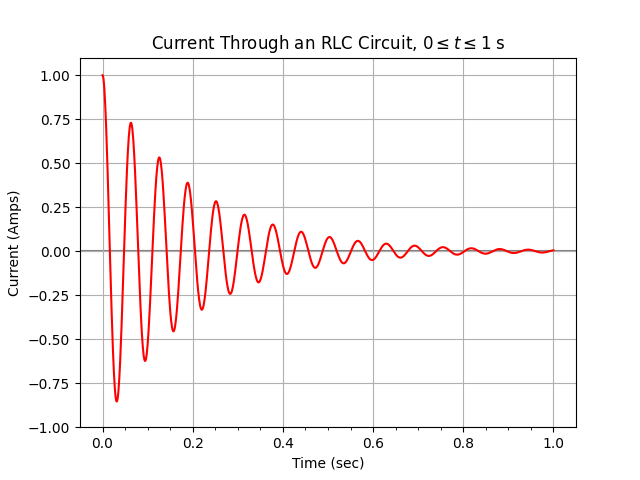

In [7]:
"""rlc_circuit.ipynb"""
# Cell 1: Plot the current over time through an RLC circuit with constant DC voltage using differential equations

# Based on code written by @dbiersach

# Imports
from __future__ import annotations

import typing

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import AutoMinorLocator
from scipy.integrate import solve_ivp  # type: ignore

if typing.TYPE_CHECKING:
    from typing import Any

    from matplotlib.axes import Axes
    from numpy.typing import NDArray

%matplotlib widget


def model(
    time: float, state_vector: tuple[float, float], r: float, l: float, c: float
) -> tuple[float, float]:
    """Store ODE for current in an RLC circuit over time"""
    i: float # Current, I
    i_prime: float # I'
    i, i_prime = state_vector
    d2_i: float = - (r / l) * i_prime - 1 / (l * c) * i # Formula for I''
    # First order diff-EQ for current (separate the 2nd order ODE into two linked 1st order ODEs)
    d1_i: float = i_prime 
    return d1_i, d2_i


def plot(ax: Axes) -> None:
    """Plot current over time for an RLC circuit using Scipy's solve_ivp function"""

    # Constants for the model
    r: float = 0.1 # Ohms
    l: float = 0.01 # Henries
    c: float = 0.01 # Farads

    # Initial conditions
    i_initial: float = 1 # Amps
    i_prime_initial: float = 0 # Amps / second

    # Set model duration (seconds)
    t_initial: float = 0
    t_final: float = 1

    # Call Scipy Initial Value Problem (ivp) Solver
    sol: Any = solve_ivp(
        model,
        (t_initial, t_final),
        [i_initial, i_prime_initial],
        max_step=0.001,
        args=[r, l, c],
    )

    # Retrieve time intervals from the IVP solver
    time_ints: NDArray[np.float_] = np.array(sol.t, dtype=np.float_)

    # Retrieve current vals from the IVP solver
    i_vals: NDArray[np.float_]
    i_vals, _ = np.array(sol.y, dtype=np.float_)

    # Plot current versus time
    ax.plot(time_ints, i_vals, color="red")

    # Set titles, axis labels, and tick marks
    ax.set_title(r"Current Through an RLC Circuit, $0 \leq t \leq 1$ s")
    ax.set_xlabel("Time (sec)")
    ax.set_ylabel("Current (Amps)")
    ax.set_ylim(-1, 1.1)
    ax.axhline(y=0, color="gray", zorder=1.5)
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.grid()


def main() -> None:
    plt.close("all")
    plt.figure(" ")
    plot(plt.axes())
    plt.show()


main()